## PCA Dimensionality Reduction on High-Dimensional Battery Feature Dataset

### 1. Data Preprocessing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# If CSV
X = pd.read_csv('X.csv')
baseline = pd.read_csv('baseline.csv')

X = X.iloc[:, ::2] # Select every second column to keep only 1 allele per gene

print(X.head())
print(baseline)

   cgpGmo-S1992.002  cgpGmo-S1995.001  cgpGmo-S2015.001  cgpGmo-S207.001  \
0               0.5               1.0               1.0              1.0   
1               0.5               0.5               1.0              1.0   
2               1.0               0.5               1.0              1.0   
3               0.5               0.5               1.0              1.0   
4               1.0               0.0               1.0              1.0   

   cgpGmo-S2122.001  cgpGmo-S2196.002  cgpGmo-S2288.002  cgpGmo-S254.001  \
0               1.0               0.5               1.0              0.5   
1               1.0               1.0               1.0              0.5   
2               0.5               0.5               1.0              1.0   
3               0.5               1.0               1.0              1.0   
4               1.0               1.0               1.0              1.0   

   cgpGmo-S287a.002  cgpGmo-S298.001  ...  cgpGmo-S988.002  Gm0289_0495.002  \
0      

In [3]:
print('Number of alleles (1 per gene taken):', X.shape[1])
print("Number of tissue samples:", X.shape[0])

Number of alleles (1 per gene taken): 50
Number of tissue samples: 487


In [4]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
pcs = pca.fit_transform(X_scaled)

explained_var = pca.explained_variance_ratio_
cumulative_var = explained_var.cumsum()

print("Explained variance ratio:", explained_var)

Explained variance ratio: [0.09944376 0.08308257 0.03480389 0.0312566  0.03001805 0.02921457
 0.02759962 0.02581438 0.02538203 0.02520328 0.0244253  0.0238504
 0.02299232 0.02237841 0.02158483 0.02122235 0.02068196 0.01977449
 0.0196578  0.01926917 0.0189696  0.01882524 0.0181941  0.0179897
 0.01722933 0.01682533 0.01663901 0.01584021 0.0155765  0.01530574
 0.0146746  0.01418383 0.0136101  0.01307915 0.0129805  0.01276951
 0.01223363 0.01203048 0.01095703 0.01041453 0.00998427 0.00973842
 0.00932912 0.0084308  0.00826538 0.00775264 0.00735376 0.00568622
 0.00494966 0.00252581]


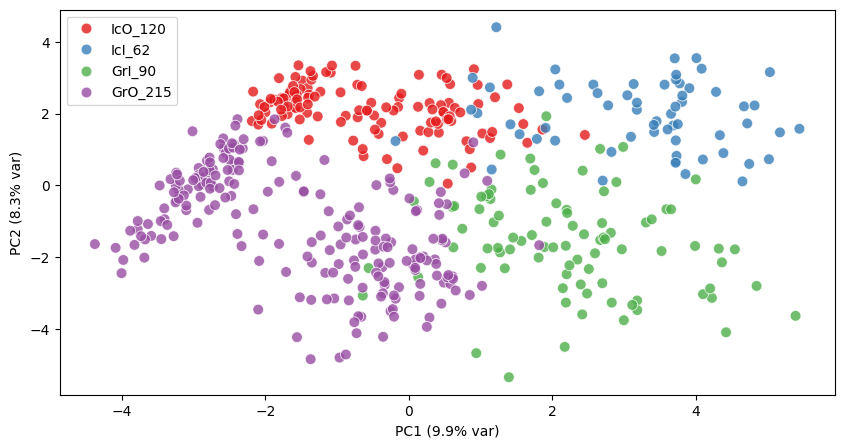

In [5]:
## plot for PC1 vs PC2 visulaization
import seaborn as sns 

evr = explained_var

pca_df = pd.DataFrame(pcs, columns=[f"PC{i+1}" for i in range(50)])
pca_df["Population"] = baseline  # baseline population values should be aligned with X
#print(pca_df.head())

# Plot the first two PCs
plt.figure(figsize=(10,5))
sns.scatterplot(
    data=pca_df,
    x="PC1",
    y="PC2",
    hue="Population",
    palette="Set1",
    s=60,
    alpha=0.8
)
plt.xlabel(f"PC1 ({evr[0]*100:.1f}% var)")
plt.ylabel(f"PC2 ({evr[1]*100:.1f}% var)")
plt.legend()
plt.show()

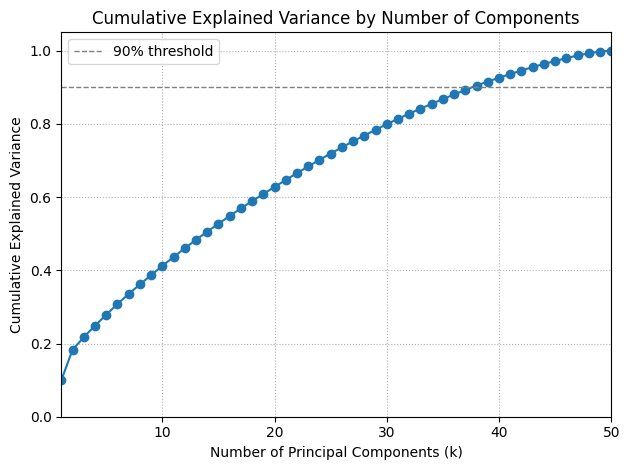

Number of components to explain 90.0% variance: 38


In [6]:
# --- Plot cumulative explained variance (3x1) ---
import numpy as np
#from sklearn.preprocessing import StandardScaler

fig, ax = plt.subplots()
xs = np.arange(1, len(explained_var)+1)
cum = cumulative_var 

tau = 0.9  # threshold can be even 0.95
k_tau = np.argmax(cum >= tau) + 1

ax.plot(xs, cum, marker="o", linewidth=1.5)
ax.axhline(tau, linestyle="--", linewidth=1.0, color="gray", label=f"{int(tau*100)}% threshold")
ax.set_ylim(0, 1.05)
ax.set_xlim(1, len(cum))
ax.set_xlabel("Number of Principal Components (k)")
ax.set_ylabel("Cumulative Explained Variance")
ax.set_title('Cumulative Explained Variance by Number of Components')
ax.grid(True, linestyle=":", linewidth=0.8)
ax.legend()


fig.tight_layout()
plt.show()


n_components_tau = np.argmax(cumulative_var >= tau) + 1
print(f"Number of components to explain {tau*100}% variance:", n_components_tau)

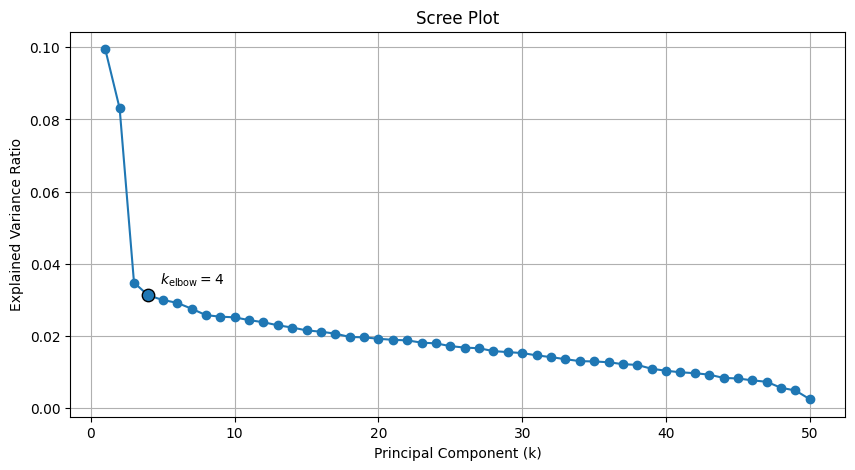

Principal Component (k) by elbow from scree plot: 4
Explained variance ratio unitl elbow point:0.249


In [7]:
## Scree plot 

def elbow_index_max_distance(y):
    """
    Heuristic elbow finder:
    - x = 1..n
    - y = sequence (e.g., explained_variance_ratio_)
    - Returns 0-based index of the point with maximum perpendicular distance
      to the line between (1, y1) and (n, yn).
    """
    n = len(y)
    x = np.arange(1, n + 1)

    # line from (x1,y1) to (xn,yn)
    x1, y1 = x[0], y[0]
    x2, y2 = x[-1], y[-1]

    # distances from each (xi, yi) to the line
    # formula for point-line distance in 2D
    num = np.abs((y2 - y1) * x - (x2 - x1) * y + x2*y1 - y2*x1)
    den = np.sqrt((y2 - y1)**2 + (x2 - x1)**2)
    dist = num / (den + 1e-12)

    return int(np.argmax(dist))

ei = elbow_index_max_distance(evr)
k_elbow = ei + 1

plt.figure(figsize=(10,5))
plt.plot(xs, evr, marker='o')
plt.scatter([k_elbow], [evr[ei]], s=80, edgecolor="black", zorder=3)
plt.annotate(rf"$k_{{\text{{elbow}}}}={k_elbow}$",
              (k_elbow, evr[ei]),
              textcoords="offset points", xytext=(8, 8))
plt.xlabel('Principal Component (k)')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

print("Principal Component (k) by elbow from scree plot:", k_elbow)
print(f"Explained variance ratio unitl elbow point:{cum[ei]:.3f}")

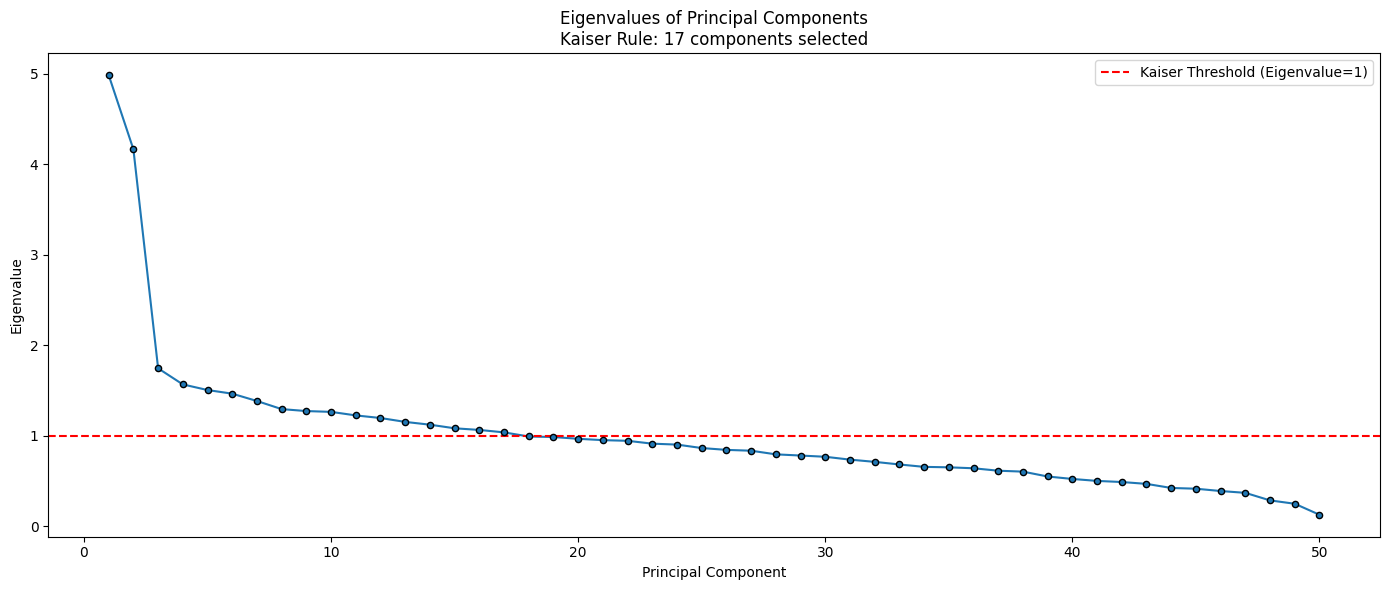

Number of components selected by Kaiser Rule (eigenvalue > 1): 17
Total number of components: 50


In [8]:
## kaisers rule : Keep PCs with eigenvalue > 1

import seaborn as sns

eigenvalues = pca.explained_variance_
num_kaiser = np.sum(eigenvalues > 1) 

plot_df = pd.DataFrame({
    'Principal Component': xs,
    'Eigenvalue': eigenvalues
})


plt.figure(figsize=(14, 6))
# sns.barplot(x='Principal Component', y='Eigenvalue', data=plot_df, color='royalblue')
plt.scatter(xs, eigenvalues, s=20, edgecolor="black", zorder=3)
plt.plot(xs, eigenvalues)
plt.axhline(1, color='red', linestyle='--', label='Kaiser Threshold (Eigenvalue=1)')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title(f'Eigenvalues of Principal Components\nKaiser Rule: {num_kaiser} components selected')
plt.legend()
plt.tight_layout()
plt.show()

print(f'Number of components selected by Kaiser Rule (eigenvalue > 1): {num_kaiser}')
print(f"Total number of components: {len(eigenvalues)}")



In [9]:
## Final results 

print(f"Total number of components: {len(eigenvalues)}")
print(f"Number of components to explain {tau*100}% variance:", n_components_tau)
print(f"Principal Component (k) by elbow from scree plot:", k_elbow)
print(f"Number of components selected by Kaiser Rule (eigenvalue > 1): {num_kaiser}")


Total number of components: 50
Number of components to explain 90.0% variance: 38
Principal Component (k) by elbow from scree plot: 4
Number of components selected by Kaiser Rule (eigenvalue > 1): 17


## Validating with simple linear regression model


=== Results for Variance threshold (90%) (38 PCs) ===
              precision    recall  f1-score   support

      GrI_90       0.93      0.78      0.85        18
     GrO_215       0.93      0.93      0.93        43
      IcI_62       0.92      0.85      0.88        13
     IcO_120       0.86      1.00      0.92        24

    accuracy                           0.91        98
   macro avg       0.91      0.89      0.90        98
weighted avg       0.91      0.91      0.91        98



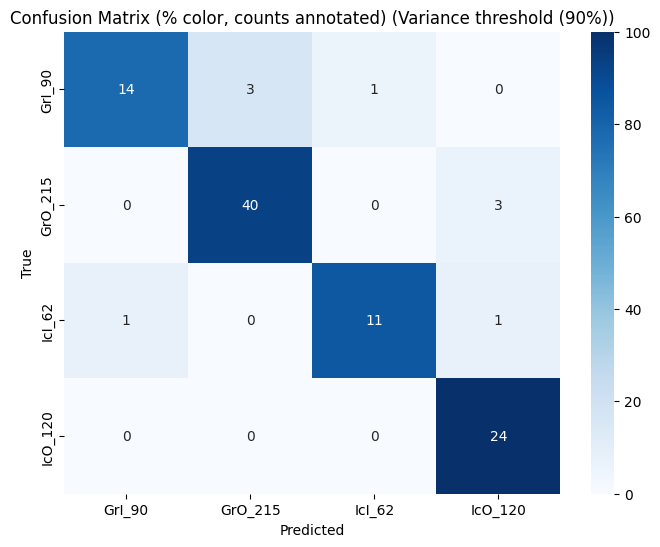


=== Results for Elbow rule (4 PCs) ===
              precision    recall  f1-score   support

      GrI_90       0.83      0.83      0.83        18
     GrO_215       0.95      0.95      0.95        43
      IcI_62       0.92      0.85      0.88        13
     IcO_120       0.96      1.00      0.98        24

    accuracy                           0.93        98
   macro avg       0.92      0.91      0.91        98
weighted avg       0.93      0.93      0.93        98



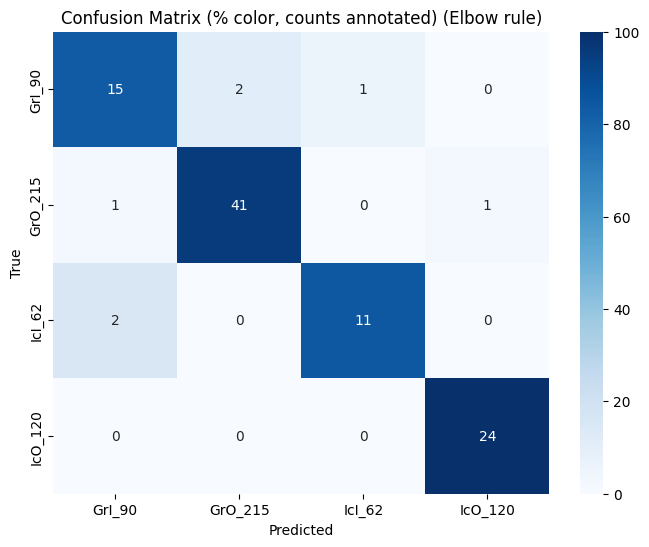


=== Results for Kaiser rule (17 PCs) ===
              precision    recall  f1-score   support

      GrI_90       0.88      0.83      0.86        18
     GrO_215       0.95      0.95      0.95        43
      IcI_62       0.86      0.92      0.89        13
     IcO_120       0.96      0.96      0.96        24

    accuracy                           0.93        98
   macro avg       0.91      0.92      0.91        98
weighted avg       0.93      0.93      0.93        98



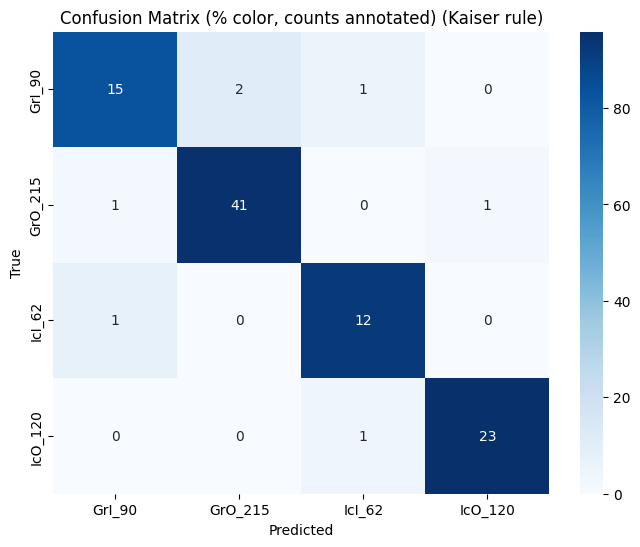


=== Results for PC1 (1 PCs) ===
              precision    recall  f1-score   support

      GrI_90       0.52      0.83      0.64        18
     GrO_215       0.66      0.95      0.78        43
      IcI_62       0.75      0.23      0.35        13
     IcO_120       0.00      0.00      0.00        24

    accuracy                           0.60        98
   macro avg       0.48      0.50      0.44        98
weighted avg       0.48      0.60      0.51        98



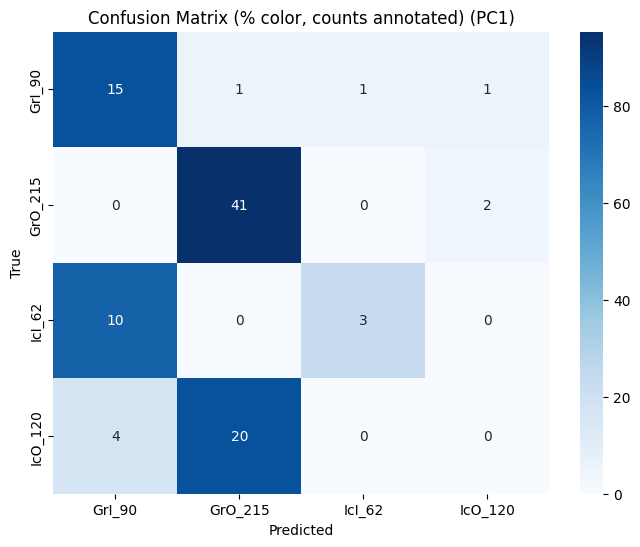


=== Results for PC1 and PC2 (2 PCs) ===
              precision    recall  f1-score   support

      GrI_90       0.88      0.83      0.86        18
     GrO_215       0.95      0.98      0.97        43
      IcI_62       0.92      0.85      0.88        13
     IcO_120       0.96      1.00      0.98        24

    accuracy                           0.94        98
   macro avg       0.93      0.91      0.92        98
weighted avg       0.94      0.94      0.94        98



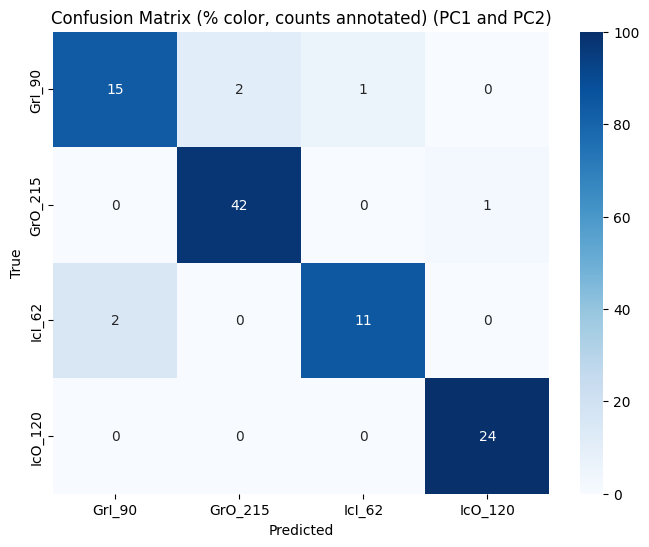

In [10]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = pd.read_csv('X.csv')
baseline = pd.read_csv('baseline.csv')
X = X.iloc[:, ::2] 

y = baseline.values.ravel()
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA()
X_train_pcs = pca.fit_transform(X_train_scaled)
X_test_pcs = pca.transform(X_test_scaled)

def classify_with_pcs(X_train_pcs, X_test_pcs, y_train, y_test, n_components, method_name):
    clf = LogisticRegression(max_iter=500)
    clf.fit(X_train_pcs[:, :n_components], y_train)
    y_pred = clf.predict(X_test_pcs[:, :n_components])

    print(f"\n=== Results for {method_name} ({n_components} PCs) ===")
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
    cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100  # row-wise %

    # Plot heatmap: color by percentage, annotate by counts
    plt.figure(figsize=(8,6))
    sns.heatmap(cm_percent, annot=cm, fmt="d", cmap="Blues",
                xticklabels=clf.classes_, yticklabels=clf.classes_)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(f"Confusion Matrix (% color, counts annotated) ({method_name})")
    plt.show()

classify_with_pcs(X_train_pcs, X_test_pcs, y_train, y_test, n_components_tau, "Variance threshold (90%)")
classify_with_pcs(X_train_pcs, X_test_pcs, y_train, y_test, k_elbow, "Elbow rule")
classify_with_pcs(X_train_pcs, X_test_pcs, y_train, y_test, num_kaiser, "Kaiser rule")
classify_with_pcs(X_train_pcs, X_test_pcs, y_train, y_test, 1, "PC1")
classify_with_pcs(X_train_pcs, X_test_pcs, y_train, y_test, 2, "PC1 and PC2")

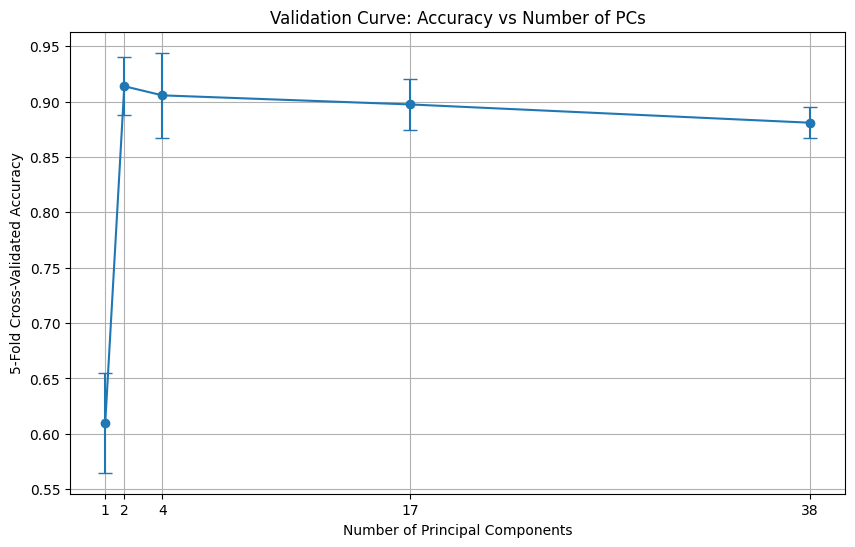

PCs=1: Accuracy=0.610 ± 0.045
PCs=2: Accuracy=0.914 ± 0.026
PCs=4: Accuracy=0.906 ± 0.039
PCs=17: Accuracy=0.897 ± 0.023
PCs=38: Accuracy=0.881 ± 0.014


In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.pipeline import Pipeline

# List of PC numbers to evaluate
n_pc_list = [1, 2, k_elbow, num_kaiser, n_components_tau]

mean_scores = []
std_scores = []

# Use StratifiedKFold to preserve population proportions
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for n_pc in n_pc_list:
    # Pipeline: scaling + PCA + logistic regression
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=n_pc)),
        ('clf', LogisticRegression(max_iter=500))
    ])
    
    # Cross-validated accuracy
    scores = cross_val_score(pipeline, X, y, cv=cv)
    mean_scores.append(scores.mean())
    std_scores.append(scores.std())

# Plot validation curve
plt.figure(figsize=(10,6))
plt.errorbar(n_pc_list, mean_scores, yerr=std_scores, fmt='-o', capsize=5)
plt.xticks(n_pc_list)
plt.xlabel("Number of Principal Components")
plt.ylabel("5-Fold Cross-Validated Accuracy")
plt.title("Validation Curve: Accuracy vs Number of PCs")
plt.grid(True)
plt.show()

# Print results
for n_pc, mean_score, std_score in zip(n_pc_list, mean_scores, std_scores):
    print(f"PCs={n_pc}: Accuracy={mean_score:.3f} ± {std_score:.3f}")